# Import Statements

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Demetia
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [6]:
# This cell updates result list for images with tumor
#      yessss
data = []
paths = []
result = []

for r, d, f in os.walk(r'training_data\yes'):

    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
#             print(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
#     print(img.shape)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [7]:
# This cell updates result list for images without tumor
# NOOO
paths = []
for r, d, f in os.walk(r"training_data\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
#     print(img.shape)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [8]:
data = np.array(data)
data.shape

(37, 128, 128, 3)

In [9]:
result = np.array(result)
result = result.reshape(37,2)

# Splitting the Data into Training & Testing

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [12]:
y_train.shape

(29, 2)

In [13]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 2.1240 - val_loss: 756.0615
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 200.8059 - val_loss: 264.7156
Epoch 3/30
1/1 [==============================] - 2s 2s/step - loss: 75.9245 - val_loss: 13.7574
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 27.0134 - val_loss: 29.8862
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 24.5936 - val_loss: 2.4710
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 3.6586 - val_loss: 29.2836
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 10.7781 - val_loss: 34.2729
Epoch 8/30
1/1 [==============================] - 2s 2s/step - loss: 9.7204 - val_loss: 22.7828
Epoch 9/30
1/1 [==============================] - 2s 2s/step - loss: 13.2678 - val_loss: 6.2346
Epoch 10/30
1/1 [==============================] - 2s 2s/step - loss: 2.8703 - val_loss: 0.2720
Epoch 11/30
1/1 [================

# Plotting Losses

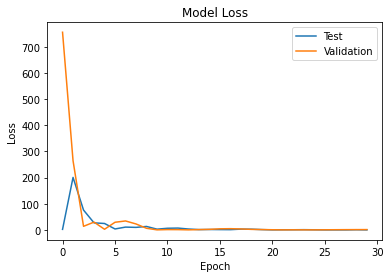

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

In [15]:
def names(number):
    if number==0:
        return 'Your MRI report matches with Dementia, Please consult to a Doctor'
    else:
        return 'You are healthy (You do not have any Dementia)'

100.0% Confidence  Your MRI report matches with Dementia, Please consult to a Doctor


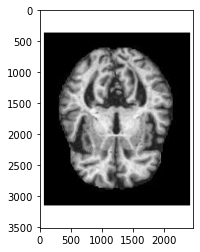

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"test_data\dementia\0001.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))

100.0% Confidence You are healthy (You do not have any Dementia)


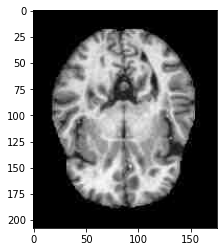

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"test_data\healthy\non2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))